In [32]:
# !pip3 install nltk
# !python -m nltk.downloader stopwords
# !python -m nltk.downloader punkt
# !pip install pandas
# !pip install nltk

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
import collections

snowball = SnowballStemmer(language='english')
stopword = stopwords.words('english')

c:\Users\IanFraser\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IanFraser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\IanFraser\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IanFraser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IanFraser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data sets collection

In [33]:
#import Text collection

arxiv_tbl = pd.read_csv('Arxiv_articles.csv')

arxiv_tbl['update_date'] = pd.to_datetime(arxiv_tbl['update_date'])

#Select which abstracts are to be run
select_dates = arxiv_tbl['update_date'] > '2020'

arxiv_tbl = arxiv_tbl.loc[select_dates]

arxiv_tbl

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,yymm
669,706.2907,Jon Yard,"Jon Yard, Igor Devetak",Optimal quantum source coding with quantum inf...,Final version,IEEE Transactions on Information Theory ( Volu...,10.1109/TIT.2009.2030494,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Consider many instances of an arbitrary quad...,"[{'version': 'v1', 'created': 'Wed, 20 Jun 200...",2020-09-29,"[['Yard', 'Jon', ''], ['Devetak', 'Igor', '']]",Sep-20
694,706.3445,Emilio Santos Corchero,Emilio Santos,Analysis of a recent experimental test of Bell...,"10 pages, no figures",Eur. Phyis. J. D 46. 531 (2008),10.1140/epjd/e2007-00322-3,NaN,quant-ph,NaN,A recent experiment by Brida et al. (arXiv:0...,"[{'version': 'v1', 'created': 'Sat, 23 Jun 200...",2021-06-23,"[['Santos', 'Emilio', '']]",Jun-21
2052,712.1494,Oliver Kern,Oliver Kern and Joseph M. Renes,Improved one-way rates for BB84 and 6-state pr...,"17 pages, to appear in Quantum Information & C...","Quantum Information & Computation, Vol.8, No.8...",10.26421/QIC8.8-9-6,NaN,quant-ph,NaN,We study the advantages to be gained in quan...,"[{'version': 'v1', 'created': 'Mon, 10 Dec 200...",2021-09-30,"[['Kern', 'Oliver', ''], ['Renes', 'Joseph M.'...",Sep-21
3462,805.3666,Andrey Pereverzev,Andrey Pereverzev and Eric R. Bittner,On the derivation of exact eigenstates of the ...,NaN,"J. Phys. Commun. 5, 055004 (2021)",NaN,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We construct the states that are invariant u...,"[{'version': 'v1', 'created': 'Fri, 23 May 200...",2021-05-13,"[['Pereverzev', 'Andrey', ''], ['Bittner', 'Er...",May-21
4846,810.3647,C{\ba}t{\ba}lin Dohotaru,"Catalin Dohotaru (U Calgary), Peter Hoyer (U C...",Exact quantum lower bound for Grover's problem,"7 pages, no figures",Quantum Information and Computation 9(5-6): 53...,10.26421/QIC9.5-6-12,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,One of the most important quantum algorithms...,"[{'version': 'v1', 'created': 'Mon, 20 Oct 200...",2022-02-01,"[['Dohotaru', 'Catalin', '', 'U Calgary'], ['H...",Feb-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77789,quant-ph/9906128,Carsten Henkel,"Carsten Henkel, Sierk Poetting, and Martin Wil...",Loss and heating of particles in small and noi...,"Slightly modified manuscript, as accepted for ...",Appl. Phys. B 69 (1999) 379-387,10.1007/s003400050823,NaN,quant-ph,NaN,We derive the life time and loss rate for a ...,"[{'version': 'v1', 'created': 'Wed, 30 Jun 199...",2021-08-06,"[['Henkel', 'Carsten', ''], ['Poetting', 'Sier...",Aug-21
77856,quant-ph/9907073,Timothy C. Ralph,T.C.Ralph,Continuous variable quantum cryptography,"8 pages, 3 figures",Phys.Rev. A61 (2000) 010302,10.1103/PhysRevA.61.010302,NaN,quant-ph,NaN,We propose a quantum cryptographic scheme in...,"[{'version': 'v1', 'created': 'Thu, 22 Jul 199...",2021-05-26,"[['Ralph', 'T. C.', '']]",May-21
77947,quant-ph/9908073,Charles H. Bennett,"Charles H. Bennett, Sandu Popescu, Daniel Rohr...",Exact and Asymptotic Measures of Multipartite ...,13 pages including 3 PostScript figures. v3 ha...,NaN,10.1103/PhysRevA.63.012307,NaN,quant-ph,NaN,In an effort to simplify the classification ...,"[{'version': 'v1', 'created': 'Tue, 24 Aug 199...",2021-05-26,"[['Bennett', 'Charles H.', ''], ['Popescu', 'S...",May-21
78184,quant-ph/9911051,Stephen A. Fulling,S. A. Fulling,"Large Numbers, the Chinese Remainder Theorem, ...",9 pages; Plain TeX with vanilla.sty and pictex...,"Phys. Rev. Applied 13, 024016 (2020)",10.1103/PhysRevApplied.13.024016,NaN,quant-ph,NaN,This is a pedagogical article cited in the f...,"[{'version': 'v1', 'created': 'Thu, 11 Nov 199...",2020-02-12,"[['Fulling', 'S. A.', '']]",Feb-20


In [34]:
taxonomy_tbl_raw = pd.read_csv('tqi_taxonomy.csv')

#select relevant section of taxonomy
taxonomy_tbl = taxonomy_tbl_raw.loc[taxonomy_tbl_raw['Classification'] == 'Secondary Classification']

#select specific group from taxonomy if desirable 
taxonomy_tbl = taxonomy_tbl.loc[taxonomy_tbl['SubClassification'] == 'Full stack and quantum computers']

taxonomy_tbl

,index,Classification,SubClassification,Type,Type Description,Unnamed: 5
28,28,Secondary Classification,Full stack and quantum computers,Superconducting transmon,Two level system of a superconducting circuit ...,NaN
29,29,Secondary Classification,Full stack and quantum computers,Trapped Ion,Single charged ions trapped in magnetic fields...,NaN
30,30,Secondary Classification,Full stack and quantum computers,Photonics,Qubits made from single particles of light (ph...,NaN
31,31,Secondary Classification,Full stack and quantum computers,Neutral atoms,Qubits made from individual atoms (rather than...,NaN
32,32,Secondary Classification,Full stack and quantum computers,Topological,Qubits made from Majorana fermions,NaN
33,33,Secondary Classification,Full stack and quantum computers,Silicon spin,Artificial atoms made by adding an electron to...,NaN


In [35]:
#Mapping subclasses

subclasses = taxonomy_tbl["SubClassification"].unique()
subclass_to_type_map = {}

for group in subclasses:
    if group not in subclass_to_type_map:
        subclass_to_type_map[group] = []
    types = taxonomy_tbl.loc[taxonomy_tbl["SubClassification"] == group]["Type"].tolist()
    for t in types:
        subclass_to_type_map[group].append(t.lower())

print(subclass_to_type_map)

{'Full stack and quantum computers': ['superconducting transmon', 'trapped ion', 'photonics', 'neutral atoms', 'topological', 'silicon spin']}


# NLTK to Abstracts

In [36]:
# Function to pre-process 

def prep_abstract(text):
    
    #tokenization
    tok_word = word_tokenize(text)

    # Lower case conversion
    lower_text = text.lower()
    tok_word_lwr = word_tokenize(lower_text)

    # Stop words removal
    removing_stopwords = [word for word in tok_word_lwr if word not in stopword]
    #print (removing_stopwords)

    # Word Stemming
    final_words = [snowball.stem(word) for word in removing_stopwords]
    
    return(final_words)

In [37]:
#testing above function

text = arxiv_tbl.iat[2,10]
print(text)
abstract1 = prep_abstract(text)


print(abstract1)

  We study the advantages to be gained in quantum key distribution (QKD)
protocols by combining the techniques of local randomization, or noisy
preprocessing, and structured (nonrandom) block codes. Extending the results of
[Smith, Renes, and Smolin, quant-ph/0607018] pertaining to BB84, we improve the
best-known lower bound on the error rate for the 6-state protocol from 14.11%
for local randomization alone to at least 14.59%. Additionally, we also study
the effects of iterating the combined preprocessing scheme and find further
improvements to the BB84 protocol already at small block lengths.

['studi', 'advantag', 'gain', 'quantum', 'key', 'distribut', '(', 'qkd', ')', 'protocol', 'combin', 'techniqu', 'local', 'random', ',', 'noisi', 'preprocess', ',', 'structur', '(', 'nonrandom', ')', 'block', 'code', '.', 'extend', 'result', '[', 'smith', ',', 'rene', ',', 'smolin', ',', 'quant-ph/0607018', ']', 'pertain', 'bb84', ',', 'improv', 'best-known', 'lower', 'bound', 'error', 'rate', '

In [10]:
### BIGRAMS NOT Developped Yet
# Words pairs to check taxonomy terms that are 2 words

# word_pairs = ngrams(abstract1,2)
# bigrams_c = {}
# for b in word_pairs:
#     if b not in bigrams_c:
#         bigrams_c[b] = 1
#     else:
#         bigrams_c[b] += 1

# bigrams_c 

# NLTK to Taxonomy

In [38]:
# isolate keywords from taxonomy
taxonomy_words = pd.DataFrame(taxonomy_tbl.iloc[:,3])
print(taxonomy_words)

#Lower case conversion
taxonomy_words['Type'] = taxonomy_words['Type'].str.lower()

taxonomy_list = taxonomy_words['Type'].tolist()

for term in range(len(taxonomy_list)):
    taxonomy_list[term] = word_tokenize(taxonomy_list[term])
    
print(taxonomy_list)

for i in range(len(taxonomy_list)):
    taxonomy_list[i] = [snowball.stem(word) for word in taxonomy_list[i]]

print("")
print(taxonomy_list)

# Lower case conversion

#lower_text = taxonomy_list.lower()
#tok_word_lwr = word_tokenize(lower_text)
#print(tok_word_lwr)

                        Type
28  Superconducting transmon
29               Trapped Ion
30                 Photonics
31             Neutral atoms
32               Topological
33              Silicon spin
[['superconducting', 'transmon'], ['trapped', 'ion'], ['photonics'], ['neutral', 'atoms'], ['topological'], ['silicon', 'spin']]

[['superconduct', 'transmon'], ['trap', 'ion'], ['photon'], ['neutral', 'atom'], ['topolog'], ['silicon', 'spin']]


# Word Counting

In [39]:
def word_counts(text, taxonomy_list):
    out = []
    counts =  nltk.FreqDist(text)   # this counts ALL word occurences
    for x in taxonomy_list:
        out.append(sum([counts[y] for y in x])) # this returns what was counted for *words
    return out

print(taxonomy_list)

example = word_counts(abstract1,taxonomy_list)
print(example)

[['superconduct', 'transmon'], ['trap', 'ion'], ['photon'], ['neutral', 'atom'], ['topolog'], ['silicon', 'spin']]
[0, 0, 0, 0, 0, 0]


# Running for full text base

In [51]:
# Return list of counted taxonomy
x = []

for i in range(len(arxiv_tbl.index)):
    text = arxiv_tbl.iat[i,10]
    abstract = prep_abstract(text)
    abst_count = word_counts(abstract, taxonomy_list)
    x.append(abst_count)

print(x[0])

[0, 0, 0, 0, 0, 0]


In [41]:
# Convert list of taxonomy counts to the category
category_list = []

for cat in x:
    if sum(cat) < 3:
        category_list.append(0)
    else:
        cat_index = cat.index(max(cat))
        cat = taxonomy_list[cat_index]
        category_list.append(cat)

print(category_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['photon'], 0, 0, 0, 0, 0, 0, ['photon'], 0, 0, 0, 0, 0, 0, 0, 0, 0, ['topolog'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['neutral', 'atom'], ['photon'], ['superconduct', 'transmon'], 0, 0, 0, 0, 0, 0, ['superconduct', 'transmon'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['photon'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['neutral', 'atom'], ['photon'], ['photon'], 0, 0, 0, 0, ['superconduct', 'transmon'], ['superconduct', 'transmon'], 0, 0, 0, ['silicon', 'spin'], 0, ['topolog'], ['photon'], 0, 0, 0, 0, 0, ['superconduct', 'transmon'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['neutral', 'atom'], 0, 0, 0, 0, 0, 0, 0, 0, 0, ['topolog'], 0, 0, ['silicon', 'spin'], ['photon'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ['superconduct', 'transmon'], 0, ['silicon', 'spin'], 0, 0, 

In [42]:
def find_first_likely(stem_list):
    for tax_word in taxonomy_words['Type'].tolist():
        if stem_list != 0:
            for stem_word in stem_list:
                if tax_word.lower().startswith(stem_word):
                    return tax_word
    return 0

def find_all_likely(stem_list):
    likely_cats = []
    for tax_word in taxonomy_words['Type'].tolist():
        if stem_list != 0:
            for stem_word in stem_list:
                if tax_word.lower().startswith(stem_word):
                    likely_cats.append(tax_word)
    return likely_cats

def find_group(cat_key):
    for x in subclass_to_type_map:
        if cat_key in subclass_to_type_map[x]:
            return x

arxiv_tbl["Assigned_cat"] = category_list
arxiv_tbl["Assigned_cat_first"] = arxiv_tbl["Assigned_cat"].apply(find_first_likely)
arxiv_tbl["Assigned_cat_all"] = arxiv_tbl["Assigned_cat"].apply(find_all_likely)
arxiv_tbl["Assigned_group"] = arxiv_tbl["Assigned_cat_first"].apply(find_group)

arxiv_tbl


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,yymm,Assigned_cat,Assigned_cat_first,Assigned_cat_all,Assigned_group
669,706.2907,Jon Yard,"Jon Yard, Igor Devetak",Optimal quantum source coding with quantum inf...,Final version,IEEE Transactions on Information Theory ( Volu...,10.1109/TIT.2009.2030494,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Consider many instances of an arbitrary quad...,"[{'version': 'v1', 'created': 'Wed, 20 Jun 200...",2020-09-29,"[['Yard', 'Jon', ''], ['Devetak', 'Igor', '']]",Sep-20,0,0,[],None
694,706.3445,Emilio Santos Corchero,Emilio Santos,Analysis of a recent experimental test of Bell...,"10 pages, no figures",Eur. Phyis. J. D 46. 531 (2008),10.1140/epjd/e2007-00322-3,NaN,quant-ph,NaN,A recent experiment by Brida et al. (arXiv:0...,"[{'version': 'v1', 'created': 'Sat, 23 Jun 200...",2021-06-23,"[['Santos', 'Emilio', '']]",Jun-21,0,0,[],None
2052,712.1494,Oliver Kern,Oliver Kern and Joseph M. Renes,Improved one-way rates for BB84 and 6-state pr...,"17 pages, to appear in Quantum Information & C...","Quantum Information & Computation, Vol.8, No.8...",10.26421/QIC8.8-9-6,NaN,quant-ph,NaN,We study the advantages to be gained in quan...,"[{'version': 'v1', 'created': 'Mon, 10 Dec 200...",2021-09-30,"[['Kern', 'Oliver', ''], ['Renes', 'Joseph M.'...",Sep-21,0,0,[],None
3462,805.3666,Andrey Pereverzev,Andrey Pereverzev and Eric R. Bittner,On the derivation of exact eigenstates of the ...,NaN,"J. Phys. Commun. 5, 055004 (2021)",NaN,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We construct the states that are invariant u...,"[{'version': 'v1', 'created': 'Fri, 23 May 200...",2021-05-13,"[['Pereverzev', 'Andrey', ''], ['Bittner', 'Er...",May-21,0,0,[],None
4846,810.3647,C{\ba}t{\ba}lin Dohotaru,"Catalin Dohotaru (U Calgary), Peter Hoyer (U C...",Exact quantum lower bound for Grover's problem,"7 pages, no figures",Quantum Information and Computation 9(5-6): 53...,10.26421/QIC9.5-6-12,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,One of the most important quantum algorithms...,"[{'version': 'v1', 'created': 'Mon, 20 Oct 200...",2022-02-01,"[['Dohotaru', 'Catalin', '', 'U Calgary'], ['H...",Feb-22,0,0,[],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77789,quant-ph/9906128,Carsten Henkel,"Carsten Henkel, Sierk Poetting, and Martin Wil...",Loss and heating of particles in small and noi...,"Slightly modified manuscript, as accepted for ...",Appl. Phys. B 69 (1999) 379-387,10.1007/s003400050823,NaN,quant-ph,NaN,We derive the life time and loss rate for a ...,"[{'version': 'v1', 'created': 'Wed, 30 Jun 199...",2021-08-06,"[['Henkel', 'Carsten', ''], ['Poetting', 'Sier...",Aug-21,"[trap, ion]",trapped ion,[trapped ion],Full stack and quantum computers
77856,quant-ph/9907073,Timothy C. Ralph,T.C.Ralph,Continuous variable quantum cryptography,"8 pages, 3 figures",Phys.Rev. A61 (2000) 010302,10.1103/PhysRevA.61.010302,NaN,quant-ph,NaN,We propose a quantum cryptographic scheme in...,"[{'version': 'v1', 'created': 'Thu, 22 Jul 199...",2021-05-26,"[['Ralph', 'T. C.', '']]",May-21,0,0,[],None
77947,quant-ph/9908073,Charles H. Bennett,"Charles H. Bennett, Sandu Popescu, Daniel Rohr...",Exact and Asymptotic Measures of Multipartite ...,13 pages including 3 PostScript figures. v3 ha...,NaN,10.1103/PhysRevA.63.012307,NaN,quant-ph,NaN,In an effort to simplify the classification ...,"[{'version': 'v1', 'created': 'Tue, 24 Aug 199...",2021-05-26,"[['Bennett', 'Charles H.', ''], ['Popescu', 'S...",May-21,0,0,[],None
78184,quant-ph/9911051,Stephen A. Fulling,S. A. Fulling,"Large Numbers, the Chinese Remainder Theorem, ...",9 pages; Plain TeX with vanilla.sty and pictex...,"Phys. Rev. Applied 13, 024016 (2020)",10.1103/PhysRevApplied.13.024016,NaN,quant-ph,NaN,This is a pedagogical article cited in the f...,"[{'version': 'v1', 'created': 'Thu, 11 Nov 199...",2020

In [43]:
arxiv_tbl_cats = arxiv_tbl[arxiv_tbl["Assigned_cat_first"] != 0]
arxiv_tbl_cats
# arxiv_tbl_cats


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,yymm,Assigned_cat,Assigned_cat_first,Assigned_cat_all,Assigned_group
8166,910.2328,Vladan Pankovic,Vladan Pankovic,Photon-detector entanglement by interference a...,"11 pages, 4 figures. arXiv admin note: substan...",NaN,NaN,PH-D/72-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In early days of navigation over sea and oce...,"[{'version': 'v1', 'created': 'Tue, 13 Oct 200...",2021-08-24,"[['Pankovic', 'Vladan', '']]",Aug-21,[photon],photonics,[photonics],Full stack and quantum computers
10251,1006.2253,Vladan Pankovic,Vladan Pankovic,Can atom be considered as a photon trajectory ...,"14 pages, 5 figures",NaN,NaN,PH-D\87-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In this work we theoretically consider a var...,"[{'version': 'v1', 'created': 'Fri, 11 Jun 201...",2021-12-28,"[['Pankovic', 'Vladan', '']]",Dec-21,[photon],photonics,[photonics],Full stack and quantum computers
12113,1101.4722,Dominic Horsman,Dominic Horsman,Quantum picturalism for topological cluster-st...,"18 pages, 21 figures. Published in New J. Phys...",New J. Phys. 13 095011 (2011),10.1088/1367-2630/13/9/095011,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Topological quantum computing is a way of al...,"[{'version': 'v1', 'created': 'Tue, 25 Jan 201...",2020-01-14,"[['Horsman', 'Dominic', '']]",Jan-20,[topolog],topological,[topological],Full stack and quantum computers
18506,1302.473,Jeremy Clark,"Jeremy B. Clark, Quentin Glorieux, Paul D. Lett",Spatially Addressable Readout and Erasure of a...,NaN,Jeremy B Clark et al 2013 New J. Phys. 15 035005,10.1088/1367-2630/15/3/035005,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We show that portions of an image written in...,"[{'version': 'v1', 'created': 'Tue, 19 Feb 201...",2020-01-30,"[['Clark', 'Jeremy B.', ''], ['Glorieux', 'Que...",Jan-20,"[neutral, atom]",neutral atoms,[neutral atoms],Full stack and quantum computers
18951,1304.2028,Ephraim Shahmoon,"Ephraim Shahmoon, Igor Mazets and Gershon Kurizki",Giant vacuum forces via transmission lines,3 figures,"Proc. Natl. Acad. Sci. USA 111, 10485 (2014)",10.1073/pnas.1401346111,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Quantum electromagnetic fluctuations induce ...,"[{'version': 'v1', 'created': 'Sun, 7 Apr 2013...",2021-05-10,"[['Shahmoon', 'Ephraim', ''], ['Mazets', 'Igor...",May-21,[photon],photonics,[photonics],Full stack and quantum computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54575,2202.08719,Sidiney Bruno Montanhano,Sidiney B. Montanhano,Differential Geometry of Contextuality,11 pages,NaN,NaN,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Contextuality has been related for a long ti...,"[{'version': 'v1', 'created': 'Thu, 17 Feb 202...",2022-02-18,"[['Montanhano', 'Sidiney B.', '']]",Feb-22,[topolog],topological,[topological],Full stack and quantum computers
54576,2202.0877,Faezeh Kimiaee Asadi,"Faezeh Kimiaee Asadi, Jia-Wei Ji, Christoph Simon",Proposal for transduction between microwave an...,"8 pages, 5 figures",NaN,NaN,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Efficient transduction devices that reversib...,"[{'version': 'v1', 'created': 'Thu, 17 Feb 202...",2022-02-18,"[['Asadi', 'Faezeh Kimiaee', ''], ['Ji', 'Jia-...",Feb-22,"[trap, ion]",trapped ion,[trapped ion],Full stack and quantum computers
76190,quant-ph/9706017,Giovanna Morigi,"G. Morigi, J. I. Cirac, M. Lewenstein, and P. ...",Ground State Laser Cooling Beyond the Lamb-Dic...,"6 pages, 4 figures, to appear in Europhysics L...","Europhys. Lett. 39, 13 (1997)",10.1209/0295-5075/23/1/001,NaN,quant-ph,NaN,We propose a laser cooling scheme that allow...,"[{'version': 'v1', 'created': 'Sat, 7 Jun 1997...",2020-05-14,"[['Morigi', 'G.', ''], ['Cirac', 'J. I.', ''],...",May-20,"[trap, ion]",trapped ion,[t

# Abstract Classification Results

In [44]:
arxiv_tbl_cats["Assigned_group"].value_counts()

Full stack and quantum computers    2044
Name: Assigned_group, dtype: int64

In [45]:
arxiv_tbl_cats["Assigned_cat_first"].value_counts()

superconducting transmon    676
photonics                   498
silicon spin                285
neutral atoms               266
trapped ion                 177
topological                 142
Name: Assigned_cat_first, dtype: int64

In [46]:
arxiv_tbl_cats.groupby("Assigned_group")["Assigned_cat_first"].value_counts()

Assigned_group                    Assigned_cat_first      
Full stack and quantum computers  superconducting transmon    676
                                  photonics                   498
                                  silicon spin                285
                                  neutral atoms               266
                                  trapped ion                 177
                                  topological                 142
Name: Assigned_cat_first, dtype: int64

In [17]:
# arxiv_tbl_cats.to_csv('artificially_labeled_abstracts.csv')

In [18]:
# arxiv_important_abstracts = arxiv_tbl_cats.drop(cols)

# Chart Results

In [47]:
arxiv_tbl_cats.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,yymm,Assigned_cat,Assigned_cat_first,Assigned_cat_all,Assigned_group
8166,910.2328,Vladan Pankovic,Vladan Pankovic,Photon-detector entanglement by interference a...,"11 pages, 4 figures. arXiv admin note: substan...",NaN,NaN,PH-D/72-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In early days of navigation over sea and oce...,"[{'version': 'v1', 'created': 'Tue, 13 Oct 200...",2021-08-24,"[['Pankovic', 'Vladan', '']]",Aug-21,[photon],photonics,[photonics],Full stack and quantum computers
10251,1006.2253,Vladan Pankovic,Vladan Pankovic,Can atom be considered as a photon trajectory ...,"14 pages, 5 figures",NaN,NaN,PH-D\87-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In this work we theoretically consider a var...,"[{'version': 'v1', 'created': 'Fri, 11 Jun 201...",2021-12-28,"[['Pankovic', 'Vladan', '']]",Dec-21,[photon],photonics,[photonics],Full stack and quantum computers
12113,1101.4722,Dominic Horsman,Dominic Horsman,Quantum picturalism for topological cluster-st...,"18 pages, 21 figures. Published in New J. Phys...",New J. Phys. 13 095011 (2011),10.1088/1367-2630/13/9/095011,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Topological quantum computing is a way of al...,"[{'version': 'v1', 'created': 'Tue, 25 Jan 201...",2020-01-14,"[['Horsman', 'Dominic', '']]",Jan-20,[topolog],topological,[topological],Full stack and quantum computers
18506,1302.473,Jeremy Clark,"Jeremy B. Clark, Quentin Glorieux, Paul D. Lett",Spatially Addressable Readout and Erasure of a...,NaN,Jeremy B Clark et al 2013 New J. Phys. 15 035005,10.1088/1367-2630/15/3/035005,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We show that portions of an image written in...,"[{'version': 'v1', 'created': 'Tue, 19 Feb 201...",2020-01-30,"[['Clark', 'Jeremy B.', ''], ['Glorieux', 'Que...",Jan-20,"[neutral, atom]",neutral atoms,[neutral atoms],Full stack and quantum computers
18951,1304.2028,Ephraim Shahmoon,"Ephraim Shahmoon, Igor Mazets and Gershon Kurizki",Giant vacuum forces via transmission lines,3 figures,"Proc. Natl. Acad. Sci. USA 111, 10485 (2014)",10.1073/pnas.1401346111,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Quantum electromagnetic fluctuations induce ...,"[{'version': 'v1', 'created': 'Sun, 7 Apr 2013...",2021-05-10,"[['Shahmoon', 'Ephraim', ''], ['Mazets', 'Igor...",May-21,[photon],photonics,[photonics],Full stack and quantum computers


In [48]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [49]:
arxiv_tbl_cats['date'] = arxiv_tbl_cats['update_date'].astype('datetime64[ns]')
arxiv_tbl_cats.head()

C:\Users\IanFraser\AppData\Local\Temp\ipykernel_18020\4294652234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arxiv_tbl_cats['date'] = arxiv_tbl_cats['update_date'].astype('datetime64[ns]')


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,yymm,Assigned_cat,Assigned_cat_first,Assigned_cat_all,Assigned_group,date
8166,910.2328,Vladan Pankovic,Vladan Pankovic,Photon-detector entanglement by interference a...,"11 pages, 4 figures. arXiv admin note: substan...",NaN,NaN,PH-D/72-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In early days of navigation over sea and oce...,"[{'version': 'v1', 'created': 'Tue, 13 Oct 200...",2021-08-24,"[['Pankovic', 'Vladan', '']]",Aug-21,[photon],photonics,[photonics],Full stack and quantum computers,2021-08-24
10251,1006.2253,Vladan Pankovic,Vladan Pankovic,Can atom be considered as a photon trajectory ...,"14 pages, 5 figures",NaN,NaN,PH-D\87-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In this work we theoretically consider a var...,"[{'version': 'v1', 'created': 'Fri, 11 Jun 201...",2021-12-28,"[['Pankovic', 'Vladan', '']]",Dec-21,[photon],photonics,[photonics],Full stack and quantum computers,2021-12-28
12113,1101.4722,Dominic Horsman,Dominic Horsman,Quantum picturalism for topological cluster-st...,"18 pages, 21 figures. Published in New J. Phys...",New J. Phys. 13 095011 (2011),10.1088/1367-2630/13/9/095011,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Topological quantum computing is a way of al...,"[{'version': 'v1', 'created': 'Tue, 25 Jan 201...",2020-01-14,"[['Horsman', 'Dominic', '']]",Jan-20,[topolog],topological,[topological],Full stack and quantum computers,2020-01-14
18506,1302.473,Jeremy Clark,"Jeremy B. Clark, Quentin Glorieux, Paul D. Lett",Spatially Addressable Readout and Erasure of a...,NaN,Jeremy B Clark et al 2013 New J. Phys. 15 035005,10.1088/1367-2630/15/3/035005,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We show that portions of an image written in...,"[{'version': 'v1', 'created': 'Tue, 19 Feb 201...",2020-01-30,"[['Clark', 'Jeremy B.', ''], ['Glorieux', 'Que...",Jan-20,"[neutral, atom]",neutral atoms,[neutral atoms],Full stack and quantum computers,2020-01-30
18951,1304.2028,Ephraim Shahmoon,"Ephraim Shahmoon, Igor Mazets and Gershon Kurizki",Giant vacuum forces via transmission lines,3 figures,"Proc. Natl. Acad. Sci. USA 111, 10485 (2014)",10.1073/pnas.1401346111,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Quantum electromagnetic fluctuations induce ...,"[{'version': 'v1', 'created': 'Sun, 7 Apr 2013...",2021-05-10,"[['Shahmoon', 'Ephraim', ''], ['Mazets', 'Igor...",May-21,[photon],photonics,[photonics],Full stack and quantum computers,2021-05-10


In [28]:
arxiv_tbl_cats.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,yymm,Assigned_cat,Assigned_cat_first,Assigned_cat_all,Assigned_group,date
8166,910.2328,Vladan Pankovic,Vladan Pankovic,Photon-detector entanglement by interference a...,"11 pages, 4 figures. arXiv admin note: substan...",NaN,NaN,PH-D/72-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In early days of navigation over sea and oce...,"[{'version': 'v1', 'created': 'Tue, 13 Oct 200...",2021-08-24,"[['Pankovic', 'Vladan', '']]",Aug-21,[photon],photonics,[photonics],Full stack and quantum computers,2021-08-24
10251,1006.2253,Vladan Pankovic,Vladan Pankovic,Can atom be considered as a photon trajectory ...,"14 pages, 5 figures",NaN,NaN,PH-D\87-2021,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,In this work we theoretically consider a var...,"[{'version': 'v1', 'created': 'Fri, 11 Jun 201...",2021-12-28,"[['Pankovic', 'Vladan', '']]",Dec-21,[photon],photonics,[photonics],Full stack and quantum computers,2021-12-28
12113,1101.4722,Dominic Horsman,Dominic Horsman,Quantum picturalism for topological cluster-st...,"18 pages, 21 figures. Published in New J. Phys...",New J. Phys. 13 095011 (2011),10.1088/1367-2630/13/9/095011,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Topological quantum computing is a way of al...,"[{'version': 'v1', 'created': 'Tue, 25 Jan 201...",2020-01-14,"[['Horsman', 'Dominic', '']]",Jan-20,[topolog],topological,[topological],Full stack and quantum computers,2020-01-14
18506,1302.473,Jeremy Clark,"Jeremy B. Clark, Quentin Glorieux, Paul D. Lett",Spatially Addressable Readout and Erasure of a...,NaN,Jeremy B Clark et al 2013 New J. Phys. 15 035005,10.1088/1367-2630/15/3/035005,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We show that portions of an image written in...,"[{'version': 'v1', 'created': 'Tue, 19 Feb 201...",2020-01-30,"[['Clark', 'Jeremy B.', ''], ['Glorieux', 'Que...",Jan-20,"[neutral, atom]",neutral atoms,[neutral atoms],Full stack and quantum computers,2020-01-30
18951,1304.2028,Ephraim Shahmoon,"Ephraim Shahmoon, Igor Mazets and Gershon Kurizki",Giant vacuum forces via transmission lines,3 figures,"Proc. Natl. Acad. Sci. USA 111, 10485 (2014)",10.1073/pnas.1401346111,NaN,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Quantum electromagnetic fluctuations induce ...,"[{'version': 'v1', 'created': 'Sun, 7 Apr 2013...",2021-05-10,"[['Shahmoon', 'Ephraim', ''], ['Mazets', 'Igor...",May-21,[photon],photonics,[photonics],Full stack and quantum computers,2021-05-10


In [54]:
arxiv_tbl_cats_simple = arxiv_tbl_cats.iloc[:,[14,16]]

In [70]:
arxiv_tbl_cats_simple['yymm'] = arxiv_tbl_cats_simple['yymm'].dt.strftime('%d-%m%Y')

AttributeError: Can only use .dt accessor with datetimelike values

In [56]:
df = pd.crosstab(arxiv_tbl_cats_simple.yymm,arxiv_tbl_cats_simple.Assigned_cat_first)

In [58]:
df

Assigned_cat_first,neutral atoms,photonics,silicon spin,superconducting transmon,topological,trapped ion
yymm,,,,,,
Apr-20,11,19,10,23,4,9
Apr-21,5,16,7,18,2,6
Aug-20,10,11,7,18,1,5
Aug-21,15,21,16,30,9,8
Dec-20,8,10,10,14,3,3
Dec-21,11,29,18,37,5,22
Feb-20,3,16,9,21,6,2
Feb-21,17,14,8,16,9,3
Feb-22,10,19,17,39,11,6


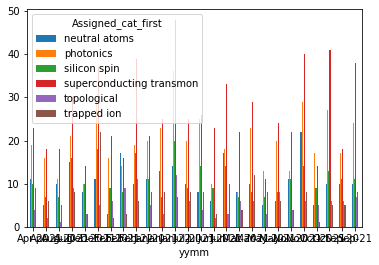

In [72]:


barplot = df.plot.bar(rot=0)
